**Classification** - Supervised learning ; Predictiong classes

1. Binary Classifier
2. Multiclass Classification
3. Multilabel Classification
4. Multioutput Classification

**MNIST dataset** - Set of 70000 small images of handwritten digits. Each image is labeled with the digit it represents.

**sklearn.datasets** - Package to use to download popular datasets.


In [ ]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',as_frame=False)
## By default it returns input data (data) as pandas dataframe and labels (target) as Pandas series. asFrame=False to return it as NumPy arrays.
## This is actually already split into a training set (first 60000 images) and a test set (last 10000 images).

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X,y=mnist.data,mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape
## There are 70000 images each with 784 features. That means each image is 28*28 pixel.
## Each feature represents one pixel's intensity from 0(white) to 255(black)

(70000, 784)

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
y.shape

(70000,)

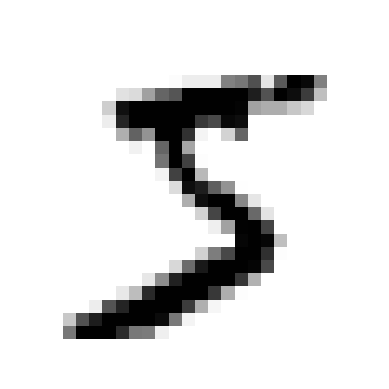

'5'

In [ ]:
## Plotting an MNIST image
import matplotlib.pyplot as plt
def plot_digit(image_data):
  image=image_data.reshape(28,28)
  plt.imshow(image,cmap='binary')
  plt.axis("off")

some_digit=X[0]
plot_digit(some_digit)
plt.show()
y[0]

In [ ]:
## Separating out train and test data
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

# 1. Training a binary classifier - 5 detector

In [ ]:
## Creating the target vectors
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

## Performance measures

1. Measuring accuracy using Cross Validation
2. Confusion Matrices
3. Precision/Recall/F1 Score
4. ROC curve

In [ ]:
## 1. Cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')
## Accuracy means ratio of correct predictions

array([0.95035, 0.96035, 0.9604 ])

Accuracy is generally not the preferred performance measure for classifiers especially when we are dealing with skewed datasets. ie when some classes are much more frequent than others.

eg: If only 10% of images are 5s, if we guess that an image is not a 5, we will be right about 90% of the time.

In [ ]:
## 2. Confusion Matrices
## General idea of confusion matrix is count the number of times instances of class A are classified as class B for all A/B pairs.

from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)   ## This returns predictions for each fold
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

Each row in confusion matrix represents actual class. Each column represents predicted class. A perfect classifier will have only TN and TP. So it will have values only on the main diagonal.


### 3. Precision/Recall/F1 score

Precision => Accuracy of positive predictions
TP/(TP+FP)

To have perfect precision => Create a classifier that makes negative predictions always except for one single positive prediction on the instance its most sure about. 1/1=100%

Recall/Sensitivity/True positive rate => Ratio of positive instances correctly detected by the classifier
TP/(TP+FN)


In [ ]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)
## This means when it claims an image represents 5, it's correct only 83.7% of the time.

0.8370879772350012

In [ ]:
recall_score(y_train_5,y_train_pred)
## This means it detects only 65.1% of all the 5 images.

0.6511713705958311

### F1 Score

Used especially when we need a single metric to compare two classifiers.
F1 score is the harmonic mean of precison and recall. Regular mean treats all values equally but harmonic mean gives weightage to low values. So F1 score will be high only if both precision and recall are high.

F1=2/(1/precision + 1/recall) = 2 * precision * recall/(precision+recall)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

F1 score favors classifiers that have similar precision and recall.

Classifier to detect videos that are safe for kids => It can reject many good videos but keep only safe ones. Shouldn't be letting bad videos to show up. High precision is preferred over recall.

Classifier to detect shoplifters in surveillance images => It ok if security guards to get a few false alarms but all the shoplifters will be caught. High recall is preferred over precision.

Increasing precision reduces recall and vice versa. This is precision/recall trade-off.

For each instance, SGDClassifier computes a score based on a decision function. If that score>threshold, it assigns it to positive class otherwise negative class. In general, higher the threshold, lower the recall and higher the precision.

In [ ]:
## To decide the value of threshold
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")
## this will give the scores for all instances. Then we use precision_recall_curve() to compute precision and recall for all possible thresholds.
## Function adds a last precision of 0 and a last recall of 1 corresponding to infinite threshold.

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

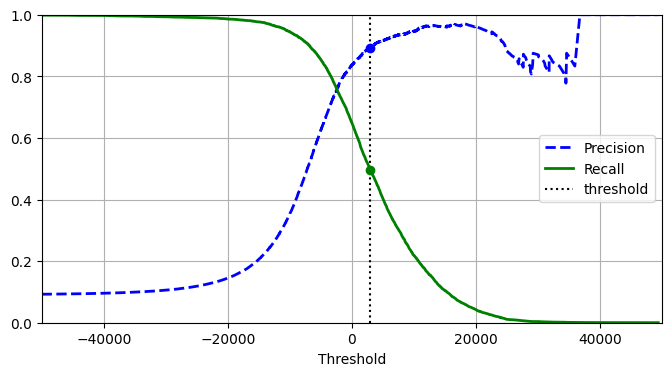

In [ ]:
threshold=3000
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

## Precision may sometimes go down when you raise threshold. So its curve is bumpier. Recall can only go down when threshold is increased.
## At threshold 3000, precision is almost 90% and recall is around 50%
## ANother way to select good precision-recall tradeoff is to plot precision directly against recall

### 4. ROC curve - Receiver Operating Characteristic
TPR - recall - TP/(TP+FN)

TNR - Specificity - TN/(TN+FP)  => Ratio of negative instances that are correctly classified as negative

FPR - Fall out => Ratio of negative instances that are incorrectly classified as positive = 1-TNR = 1-specificity

ROC curve plots TPR against FPR

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

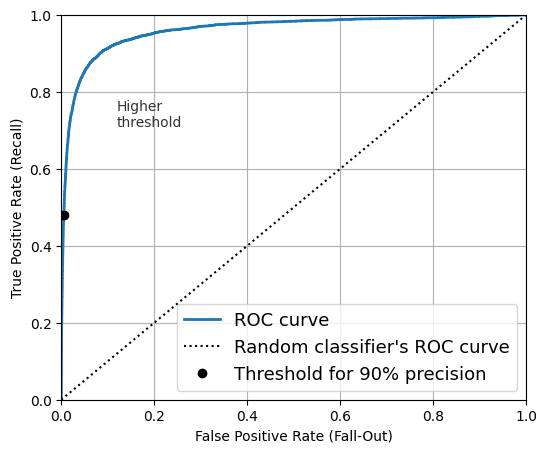

In [ ]:
threshold_for_90_precision=3370.019
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7

plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

Higher the recall the more false positives it produces. A good classifier stays as far away from that line as possible toward the top left corner.

Another way to compare 2 classifiers is based on AUC-Area Under the Curve. A perfect classifier will have ROC-AUC equal to 1 whereas a purely random classifier will have ROC-AUC equal to 0.5

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

Use PR curve when we care more about the false positives than the false negatives otherwise use ROC curve. A precision-recall curve focuses on the positive class, while an ROC curve considers both the positive and the negative class. This means that a precision-recall curve is more informative for imbalanced datasets, where the positive class is rare or more important than the negative class. A good PR curve has greater AUC.

In the above example ROC AUC score is good but thats because there are only few positives compared to the negatives. From PR curve its clear that there's still room for improvement. The curve could really be closer to the top right corner.

**Training binary classifiers:**

Choose the appropriate metric for the task

Evaluate your classifiers using cross validation

Select the precision/recall trade-off that fits your needs

Use several metrics and curves to compare various models.

# 2. Multiclass classification (Multinomial classifiers)

- It can distinguish between more than 2 classes.
- LogisticRegression,RandomForestClassifier are natively multiclass classifiers
- SGDClassifier,SVC are binary classifiers


## Multiclass classification using multiple binary classifiers (For MNIST)
1.   One-versus-Rest or One-versus-All (OvR/OvA)
Create a system that can classify the digit images into 10 classes - from 0 to 9 - is to train 10 binary classifiers, one for each digit eg: a 0-detector. When we want to classify an image, we get decision score from each classifier for that image and we select the class whose classifer outputs the highest score.

2.   One-versus-One (OvO)
Train a binary classifer for every pair of digits eg: one to distinguish between 0 and 1, another one to distinguish between 0 and 2 etc. If there are N classes, we need N*(N-1)/2 classifers. For MNIST 45 classifiers. When we want to classify an image, we run the image through all the 45 classifers. However each classifer needs to be trained on the part of the training set containing the 2 classes that it must distinguish.

Some algorithms like SVC scale poorly with size of training set. For these algos OvO is preferred because its faster to train many classifers on small training sets than to train few classifers on large training set. But mostly OvR is preferred.



In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000],y_train[:2000])      ## Training only on 2000 images

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
## Scaling the inputs increases the accuracy
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sgd_clf=SGDClassifier(random_state=42)
X_train_scaled=scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

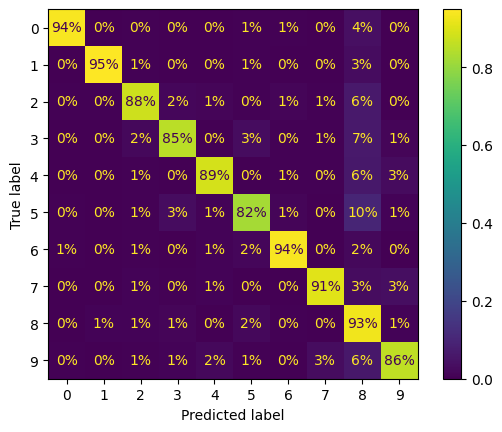

In [ ]:
### Error analysis to improve the model
## 1. Look at confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize='true',values_format=".0%")

82% of 5 are classifed correctly. Most common error is 5 misunderstood as 8. But only 2% of 8 are misclassified as 5. If we want to make the errors stand out more, we can put 0 weight for correct predictions.

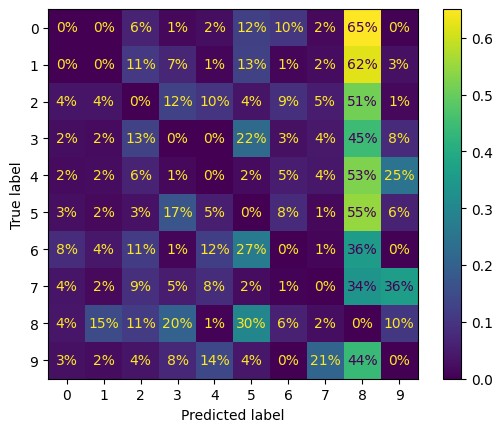

In [ ]:
sample_weight=(y_train_pred!=y_train)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,sample_weight=sample_weight,normalize='true',values_format=".0%")

## Many images got misclassifed as 8.36% in row 7 column 9 implies 36% of errors in classification of images 7 were miscalssification as 9s.

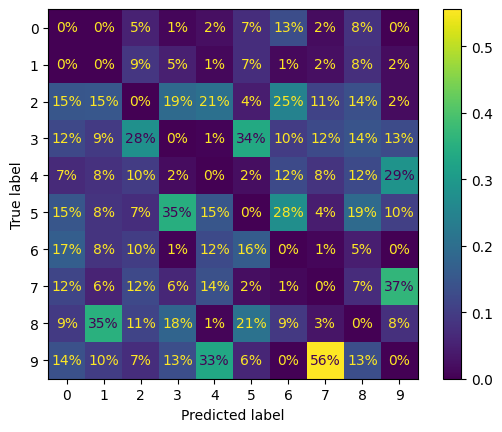

In [ ]:
## Normalizing confusion matrix by column
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,sample_weight=sample_weight,normalize='pred',values_format=".0%")

Seems like efforts should be spent on reducing false 8s.

1. We could try to gather more training data for digits that look like 8s.
2. Engineer new features like an algorithm to count the number of closed loops. 2 in case of 8.

Analyzing individual errors is also a good way to understand where model is failing. For example, there's a confusion between 3 and 5.

Solution - Augmenting the training set with slightly rotated and shifted variants of the training images. This will force the model to learn to be tolerant to such variations. This is called data augmentation.

# 3. Multilabel Classification - Multiple classes for each instance
**eg: KNeighborsClassifier**

Classification system that outputs multiple binary tags.

eg: Face recognition classifier. It recognizes several people in the same image. It should attach one tag per person it recognizes.

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large= (y_train>='7')
y_train_odd= (y_train.astype('int8')%2 == 1)
y_multilabel=np.c_[y_train_large,y_train_odd]
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
## Evaluating multilabel classifier
## 1. Measure F1 score(or any other binary classifier metric)  for each individual label , then simply compute the average score.
y_train_knn_pred=cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average="macro")
## This approach assumes all labels are equally important.
## Otherwise give each lable a weight equal to its support ie the number of instances with the target label => average="weighted"

0.976410265560605

In [ ]:
## Use ChainClassifer if we wish to use classifier that doesn't support multilabel classification natively.
from sklearn.multioutput import ClassifierChain
chain_clf=ClassifierChain(SVC(),cv=3,random_state=42)
chain_clf.fit(X_train[:2000],y_multilabel[:2000])
chain_clf.predict([some_digit])


array([[0., 1.]])

# 4. Multioutput Classification
Each label can be multiclass
eg: System that removes noise from images.

Input - noisy digit image.

Output - Clean digit image.

Classifier's output is one label per pixel. Each label can have multiple values say from 0 to 255.

In [ ]:
## Introducing noise to images
np.random.seed(42)
noise=np.random.randint(0,100,(len(X_train),784))
X_train_mod=X_train+noise
noise=np.random.randint(0,100,(len(X_test),784))
X_test_mod=X_test+noise
y_train_mod=X_train
y_test_mod=X_test

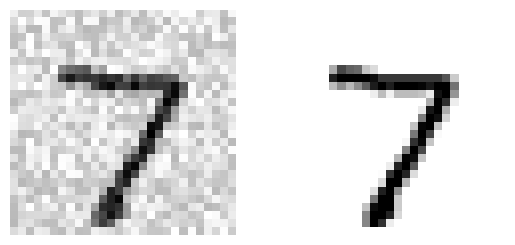

In [ ]:
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
plt.show()

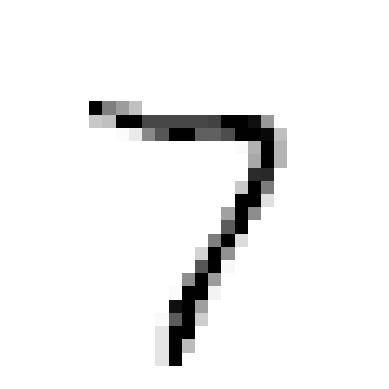

In [ ]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit=knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()